# MWE: Denoising by Delaunay triangulation on zeros

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.utilities.utils import one_sided_spectrogram_and_zeros
from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.Benchmark import Benchmark
from src.methods.method_delaunay_triangulation import delaunay_triangulation_denoising
from src.utilities.scale_functions import scale_fun_APF, scale_fun_Fvs

from src.stft_wrap.stft_wrapper import compute_spectrogram_and_zeros, compute_istft

from IPython.display import Audio

In [2]:
np.random.seed(1) 
N = 2**13
sbank = SignalBank(N=N, return_signal=False)
# tmin = sbank.tmin
# tmax = sbank.tmax
# s = sbank.signal_linear_chirp(a=1.5,b=0.1)
s = sbank.signal_mc_impulses(5)

s = sbank.signal_mc_synthetic_mixture_3()
# t = np.arange(N)
# s1 = np.cos(2*pi*0.25*t)
# ssum = np.sum(s1**2)
# s2 = np.zeros_like(s1)
# s2[N//2]= ssum**0.5

# s = s1+s2

# import librosa
# s, fs = librosa.load(librosa.ex('trumpet'), duration=1.5, sr=8000)
# s = s[0:N]

In [3]:
SNRin = 15
noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin, )

In [4]:
Nfft=2*N
output = delaunay_triangulation_denoising(signal,
                                Nfft=Nfft,
                                return_dic=True,
                                grouping = False,
                                # scale_fun=scale_fun_APF,
                                LB = 1.85,
                                mcsim_path='src/utilities/simulations',
                                )                               

signal_output, mask, tri, tri_select, zeros = ( output[key] for key in 
                                    ('s_r','mask','tri','tri_select','zeros')
                                    )

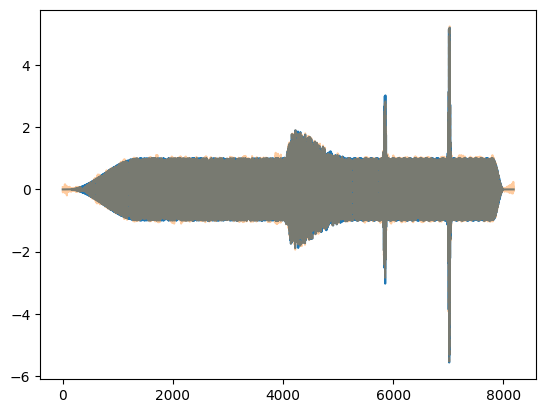

In [5]:
plt.plot(s)
plt.plot(signal_output,'--', alpha=0.4)
# plt.plot(rsignal[200:300],'k--')

In [6]:
# S,_,F = one_sided_spectrogram_and_zeros(s)
# S_output,_,F_output = one_sided_spectrogram_and_zeros(s)

# fig, ax = plt.subplots(1,3,figsize = (15,10))
# # [ax.axis('off') for ax in ax]
# ax[0].imshow(abs(F), origin='lower')
# ax[0].set_title('Input Signal')
# ax[1].imshow(abs(F_output), origin='lower')
# ax[1].set_title('Output Signal')
# ax[2].imshow(mask, origin='lower')
# ax[2].set_title('Mask')
# plt.show()

In [7]:
tmin = int(np.sqrt(Nfft))
tmax = N-tmin
print(Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax))
# print(Benchmark.snr_comparison(s,rsignal,tmin=tmin,tmax=tmax))

23.947219486864736


In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(1,1)
# ax.imshow(abs(F_output)**2, origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
ax.imshow(abs(mask)**2, origin='lower', aspect='auto')
ax.plot([200,200],[200, 550],'r--')
ax.plot([200,450],[200, 200],'r--')
ax.plot([450,450],[200, 550],'r--')
ax.plot([200,450],[550, 550],'r--')
ax.set_ylabel('frequency', fontsize=6)
ax.set_xlabel('time', fontsize=6)
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)


plt.show()
# fig.savefig('figures/errors_dt_panel_1.pdf', dpi=900, transparent=False, bbox_inches='tight', 
#             pad_inches=0.01)
